In [1]:
import findspark
findspark.init()

import pandas as pd
import pyspark

In [2]:
from pyspark.sql import functions as f
import pandas as pd

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Covid')\
        .getOrCreate()

22/08/25 18:02:03 WARN Utils: Your hostname, MacBook-Air-de-Willians.local resolves to a loopback address: 127.0.0.1; using 192.168.18.9 instead (on interface en0)
22/08/25 18:02:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/25 18:02:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/25 18:02:09 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


## Visualizando la data

In [5]:
dataCovid = spark.read.csv(
    'archive/covid_19_clean_complete.csv',
    sep = ',',
    header = True,
    )

dataCovid.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: string (nullable = true)
 |-- Long: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Confirmed: string (nullable = true)
 |-- Deaths: string (nullable = true)
 |-- Recovered: string (nullable = true)
 |-- Active: string (nullable = true)
 |-- WHO Region: string (nullable = true)



In [6]:
dataCovid.show(7)

+--------------+-------------------+--------+---------+----------+---------+------+---------+------+--------------------+
|Province/State|     Country/Region|     Lat|     Long|      Date|Confirmed|Deaths|Recovered|Active|          WHO Region|
+--------------+-------------------+--------+---------+----------+---------+------+---------+------+--------------------+
|          null|        Afghanistan|33.93911|67.709953|2020-01-22|        0|     0|        0|     0|Eastern Mediterra...|
|          null|            Albania| 41.1533|  20.1683|2020-01-22|        0|     0|        0|     0|              Europe|
|          null|            Algeria| 28.0339|   1.6596|2020-01-22|        0|     0|        0|     0|              Africa|
|          null|            Andorra| 42.5063|   1.5218|2020-01-22|        0|     0|        0|     0|              Europe|
|          null|             Angola|-11.2027|  17.8739|2020-01-22|        0|     0|        0|     0|              Africa|
|          null|Antigua 

#### Actualizando estructura de datos

In [7]:
from pyspark.sql.types import *

data_schema = [
               StructField('Province/State', StringType(), True),
               StructField('Country/Region', StringType(), True),
               StructField('Lat', DoubleType(), True),
               StructField('Long', DoubleType(), True),
               StructField('Date', DateType(), True),
               StructField('Confirmed', IntegerType(), True),
               StructField('Deaths', IntegerType(), True),
               StructField('Recovered', IntegerType(), True),
               StructField('Active', IntegerType(), True),
               StructField('WHO Region', StringType(), True),
            ]

final_struc = StructType(fields=data_schema)

In [8]:
dataCovid = spark.read.csv(
    'archive/covid_19_clean_complete.csv',
    sep = ',',
    header = True,
    schema = final_struc
    )

In [9]:
dataCovid.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Date: date (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Recovered: integer (nullable = true)
 |-- Active: integer (nullable = true)
 |-- WHO Region: string (nullable = true)



In [10]:
dataCovid.show(5)

+--------------+--------------+--------+---------+----------+---------+------+---------+------+--------------------+
|Province/State|Country/Region|     Lat|     Long|      Date|Confirmed|Deaths|Recovered|Active|          WHO Region|
+--------------+--------------+--------+---------+----------+---------+------+---------+------+--------------------+
|          null|   Afghanistan|33.93911|67.709953|2020-01-22|        0|     0|        0|     0|Eastern Mediterra...|
|          null|       Albania| 41.1533|  20.1683|2020-01-22|        0|     0|        0|     0|              Europe|
|          null|       Algeria| 28.0339|   1.6596|2020-01-22|        0|     0|        0|     0|              Africa|
|          null|       Andorra| 42.5063|   1.5218|2020-01-22|        0|     0|        0|     0|              Europe|
|          null|        Angola|-11.2027|  17.8739|2020-01-22|        0|     0|        0|     0|              Africa|
+--------------+--------------+--------+---------+----------+---

#### Generando file parquet

In [12]:
dataCovid.write.parquet('data/parquets/covid19')

In [13]:
dfParquet = spark.read.parquet('data/parquets/covid19')
dfParquet.show(6)

+--------------+-------------------+--------+---------+----------+---------+------+---------+------+--------------------+
|Province/State|     Country/Region|     Lat|     Long|      Date|Confirmed|Deaths|Recovered|Active|          WHO Region|
+--------------+-------------------+--------+---------+----------+---------+------+---------+------+--------------------+
|          null|        Afghanistan|33.93911|67.709953|2020-01-22|        0|     0|        0|     0|Eastern Mediterra...|
|          null|            Albania| 41.1533|  20.1683|2020-01-22|        0|     0|        0|     0|              Europe|
|          null|            Algeria| 28.0339|   1.6596|2020-01-22|        0|     0|        0|     0|              Africa|
|          null|            Andorra| 42.5063|   1.5218|2020-01-22|        0|     0|        0|     0|              Europe|
|          null|             Angola|-11.2027|  17.8739|2020-01-22|        0|     0|        0|     0|              Africa|
|          null|Antigua 

In [14]:
import numpy as np

In [15]:
dataCovid.describe().toPandas()

,summary,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region
0,count,14664,49068,49068,49068,49068,49068,49068,49068,49068
1,mean,None,None,21.433730459769688,23.528236452106245,16884.90425531915,884.1791595337083,7915.713479253282,8085.01161653216,None
2,stddev,None,None,24.95031982606509,70.4427397445028,127300.20527228026,6313.584410596534,54800.91873054013,76258.90302550694,None
3,min,Alberta,Afghanistan,-51.7963,-135.0,0,0,0,-14,Africa
4,max,Zhejiang,Zimbabwe,71.7069,178.065,4290259,148011,1846641,2816444,Western Pacific


### Agrupando por Region WHO el numero de casos Confirmed, Deaths y Recovered

In [16]:
dataCovid.select(['WHO Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']).groupBy('WHO Region').mean().show()

+--------------------+------------------+------------------+------------------+------------------+
|          WHO Region|    avg(Confirmed)|       avg(Deaths)|    avg(Recovered)|       avg(Active)|
+--------------------+------------------+------------------+------------------+------------------+
|              Europe| 16547.85857712766|1281.3191489361702|  8191.62732712766|  7074.91210106383|
|     Western Pacific| 2550.716731141199| 90.17698259187621|1824.1731141199227| 636.3666344294004|
|              Africa|2414.8744459219856| 48.75642730496454|1240.4399379432625|1125.6780806737588|
|Eastern Mediterra...|17911.724371373308| 465.1907640232108|11617.674806576402| 5828.858800773694|
|            Americas|46514.939176688255| 2238.586031452359|18162.516651248843|26113.836493987048|
|     South-East Asia| 29318.27925531915| 775.6031914893617|15973.578191489361|12569.097872340426|
+--------------------+------------------+------------------+------------------+------------------+



### Visualización de datos

In [19]:
sec_df =  dataCovid.select(['WHO Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']).groupBy('WHO Region').mean().toPandas()

In [20]:
sec_df

,WHO Region,avg(Confirmed),avg(Deaths),avg(Recovered),avg(Active)
0,Europe,16547.858577,1281.319149,8191.627327,7074.912101
1,Western Pacific,2550.716731,90.176983,1824.173114,636.366634
2,Africa,2414.874446,48.756427,1240.439938,1125.678081
3,Eastern Mediterranean,17911.724371,465.190764,11617.674807,5828.858801
4,Americas,46514.939177,2238.586031,18162.516651,26113.836494
5,South-East Asia,29318.279255,775.603191,15973.578191,12569.097872


<AxesSubplot:xlabel='WHO Region'>

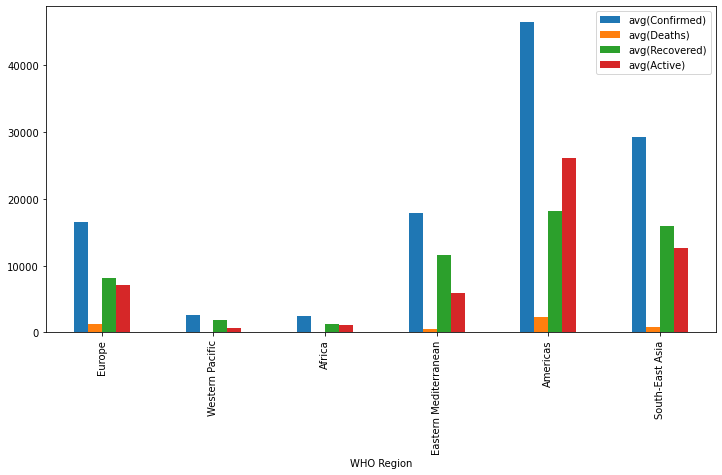

In [21]:
sec_df.plot(kind = 'bar', x='WHO Region', y = sec_df.columns.tolist()[1:], figsize=(12, 6))